In [ ]:
#!cp -r /content/drive/MyDrive/ICU_Dataset/ICUDatasetProcessed .

In [1]:
#!pip install numpy
#!pip install pandas
#!pip instal os
#!pip install scikit-learn

import numpy as np  
import pandas as pd
import os 
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv("ICUDatasetProcessed/environmentMonitoring.csv")
df1.columns

Index(['frame.time_delta', 'frame.time_relative', 'frame.len', 'ip.src',
       'ip.dst', 'tcp.srcport', 'tcp.dstport', 'tcp.flags', 'tcp.time_delta',
       'tcp.len', 'tcp.ack', 'tcp.connection.fin', 'tcp.connection.rst',
       'tcp.connection.sack', 'tcp.connection.syn', 'tcp.flags.ack',
       'tcp.flags.fin', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.flags.syn',
       'tcp.flags.urg', 'tcp.hdr_len', 'tcp.payload', 'tcp.pdu.size',
       'tcp.window_size_value', 'tcp.checksum', 'mqtt.clientid',
       'mqtt.clientid_len', 'mqtt.conack.flags', 'mqtt.conack.val',
       'mqtt.conflag.passwd', 'mqtt.conflag.qos', 'mqtt.conflag.reserved',
       'mqtt.conflag.retain', 'mqtt.conflag.willflag', 'mqtt.conflags',
       'mqtt.dupflag', 'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg',
       'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.topic',
       'mqtt.topic_len', 'mqtt.ver', 'mqtt.willmsg_len', 'ip.proto', 'ip.ttl',
       'class', 'label'],
      dtype='object')

In [5]:
df1

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,...,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
0,0.000000,0.000000,105,10.5.126.151,10.5.126.84,40629,1883,0x00000018,0.000000,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,environmentMonitoring,0
1,0.000053,0.000053,72,10.5.126.84,10.5.126.151,1883,40629,0x00000018,0.000053,4,...,0.0,0.0,0,0.0,0.0,0.0,6,64,environmentMonitoring,0
2,0.000043,0.000096,105,10.5.126.153,10.5.126.84,45639,1883,0x00000018,0.000000,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,environmentMonitoring,0
3,0.000020,0.000116,72,10.5.126.84,10.5.126.153,1883,45639,0x00000018,0.000020,4,...,0.0,0.0,0,0.0,0.0,0.0,6,64,environmentMonitoring,0
4,0.000016,0.000132,105,10.5.126.155,10.5.126.84,45093,1883,0x00000018,0.000000,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,environmentMonitoring,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31753,0.000008,2047.246123,80,10.5.150.152,10.5.150.109,37239,1883,0x00000018,2.998972,12,...,0.0,0.0,CoGas,5.0,0.0,0.0,6,64,environmentMonitoring,0
31754,0.000058,2047.246181,72,10.5.150.109,10.5.150.156,1883,44939,0x00000018,0.000083,4,...,0.0,0.0,0,0.0,0.0,0.0,6,64,environmentMonitoring,0
31755,0.000011,2047.246192,72,10.5.150.109,10.5.150.157,1883,44853,0x00000018,0.000119,4,...,0.0,0.0,0,0.0,0.0,0.0,6,64,environmentMonitoring,0
31756,0.000010,2047.246202,72,10.5.150.109,10.5.150.156,1883,37361,0x00000018,0.000109,4,...,0.0,0.0,0,0.0,0.0,0.0,6,64,environmentMonitoring,0


In [6]:
import os
path = 'ICUDatasetProcessed/'
csvs = os.listdir(path)
csvs

['AdaBoost_model.pkl',
 'Attack.csv',
 'DecisionTree_model.pkl',
 'ensemble_model.pkl',
 'environmentMonitoring.csv',
 'GaussianNB_model.pkl',
 'KNN_model.pkl',
 'LogisticRegression_model.pkl',
 'patientMonitoring.csv',
 'RandomForest_model.pkl']

In [6]:
import os
import pandas as pd

# Caminho para os arquivos
path = 'ICUDatasetProcessed/'
csvs = [file for file in os.listdir(path) if file.endswith('.csv')]

# Lista para armazenar os DataFrames lidos
dfs = []

for csv in csvs:
    print(f'---- Reading {csv} ----')
    try:
        # Ler o CSV
        df = pd.read_csv(os.path.join(path, csv))
        print(f'df.shape: {df.shape}')
        
        # Identificar colunas completamente vazias
        empty_cols = [col for col in df.columns if df[col].isnull().all()]
        print(f'empty_cols: {len(empty_cols)}')
        print(empty_cols)
        
        # Preencher valores NaN com 0
        df.fillna(0, inplace=True)
        
        # Adicionar o DataFrame à lista
        dfs.append(df)
        print(f"Current dfs length: {len(dfs)}")
    except Exception as e:
        print(f"Erro ao ler {csv}: {e}")

# Realizar o merge ou a concatenação
if dfs:
    # Identificar colunas comuns
    common_columns = set.intersection(*(set(df.columns) for df in dfs))
    print(f"Colunas comuns para merge: {common_columns}")

    # Ajustar os tipos das colunas comuns para evitar erros
    for col in common_columns:
        col_types = {df[col].dtype for df in dfs if col in df.columns}
        if len(col_types) > 1:
            print(f"Ajustando coluna '{col}' com tipos diferentes: {col_types}")
            for df in dfs:
                if col in df.columns:
                    # Força todas as colunas para o tipo string como padrão
                    df[col] = df[col].astype(str)

    # Realizar o merge
    try:
        merged_df = dfs[0]
        for df in dfs[1:]:
            merged_df = pd.merge(merged_df, df, on=list(common_columns), how='outer')
        print(f"Final merged_df shape: {merged_df.shape}")
    except ValueError as e:
        print(f"Erro no merge: {e}. Realizando concatenação como fallback.")
        merged_df = pd.concat(dfs, ignore_index=True)

else:
    print("Nenhum arquivo válido foi lido.")



---- Reading Attack.csv ----


C:\Users\ZINGA\AppData\Local\Temp\ipykernel_28184\1457436976.py:15: DtypeWarning: Columns (26,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, csv))


df.shape: (80126, 52)
empty_cols: 0
[]
Current dfs length: 1
---- Reading environmentMonitoring.csv ----
df.shape: (31758, 52)
empty_cols: 0
[]
Current dfs length: 2
---- Reading patientMonitoring.csv ----


C:\Users\ZINGA\AppData\Local\Temp\ipykernel_28184\1457436976.py:15: DtypeWarning: Columns (26,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, csv))


df.shape: (76810, 52)
empty_cols: 0
[]
Current dfs length: 3
Colunas comuns para merge: {'ip.dst', 'tcp.connection.sack', 'mqtt.clientid_len', 'mqtt.conflag.willflag', 'mqtt.conflag.passwd', 'tcp.flags.reset', 'tcp.checksum', 'label', 'mqtt.msgtype', 'mqtt.conack.val', 'mqtt.ver', 'ip.src', 'mqtt.clientid', 'tcp.window_size_value', 'mqtt.conflag.reserved', 'class', 'mqtt.topic_len', 'mqtt.conack.flags', 'mqtt.len', 'tcp.connection.rst', 'mqtt.retain', 'mqtt.conflags', 'tcp.len', 'mqtt.hdrflags', 'tcp.payload', 'mqtt.conflag.retain', 'tcp.flags.ack', 'mqtt.willmsg_len', 'tcp.flags.push', 'tcp.connection.fin', 'tcp.pdu.size', 'ip.ttl', 'mqtt.kalive', 'tcp.dstport', 'mqtt.topic', 'tcp.flags.fin', 'tcp.connection.syn', 'frame.len', 'tcp.flags.syn', 'tcp.flags', 'tcp.srcport', 'tcp.time_delta', 'frame.time_relative', 'tcp.ack', 'tcp.hdr_len', 'mqtt.qos', 'mqtt.dupflag', 'ip.proto', 'mqtt.conflag.qos', 'tcp.flags.urg', 'mqtt.msg', 'frame.time_delta'}
Ajustando coluna 'mqtt.msgtype' com tipos

In [9]:
df1

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,...,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
0,0.000000,0.000000,74,10.16.120.44,10.16.120.72,56808,1883,0x00000002,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
1,0.000052,0.000052,74,10.16.120.72,10.16.120.44,1883,56808,0x00000012,0.000052,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
2,0.000008,0.000060,74,10.16.120.44,10.16.120.72,56810,1883,0x00000002,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
3,0.000012,0.000072,74,10.16.120.72,10.16.120.44,1883,56810,0x00000012,0.000012,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
4,0.000003,0.000075,74,10.16.120.44,10.16.120.72,56812,1883,0x00000002,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188689,0.000196,6611.037621,78,10.5.126.165,10.5.126.56,44993,1883,0x00000018,1.989358,10,...,0.0,0.0,ECG,3.0,0.0,0.0,6,64,patientMonitoring,0
188690,0.000172,6611.037793,77,10.5.126.147,10.5.126.56,38323,1883,0x00000018,1.989338,9,...,0.0,0.0,EMG,3.0,0.0,0.0,6,64,patientMonitoring,0
188691,0.000126,6611.037919,77,10.5.126.147,10.5.126.56,41889,1883,0x00000018,1.989337,9,...,0.0,0.0,EMG,3.0,0.0,0.0,6,64,patientMonitoring,0
188692,0.000146,6611.038065,77,10.5.126.167,10.5.126.56,35965,1883,0x00000018,1.989211,9,...,0.0,0.0,EMG,3.0,0.0,0.0,6,64,patientMonitoring,0


In [10]:
import os
import pandas as pd

# Caminho para os arquivos
path = 'ICUDatasetProcessed/'
csvs = [file for file in os.listdir(path) if file.endswith('.csv')]

# Lista para armazenar os DataFrames
dfs = []
for csv in csvs:
    df = pd.read_csv(os.path.join(path, csv))
    dfs.append(df)

# Função para encontrar colunas inconsistentes
def find_inconsistent_columns(dfs):
    inconsistent_columns = {}
    for col in dfs[0].columns:  # Use as colunas do primeiro DataFrame como base
        types = {df[col].dtype for df in dfs if col in df.columns}
        if len(types) > 1:
            inconsistent_columns[col] = list(types)
    return inconsistent_columns

# Identificar e corrigir
inconsistent_columns = find_inconsistent_columns(dfs)

if inconsistent_columns:
    print("Colunas com tipos inconsistentes:")
    for col, types in inconsistent_columns.items():
        print(f"Coluna: {col}, Tipos encontrados: {types}")
        
        # Corrigir os tipos para strings como padrão
        for df in dfs:
            if col in df.columns:
                df[col] = df[col].astype(str)

    # Recriar merged_df após correções
    merged_df = pd.concat(dfs, ignore_index=True)
    print(f"Após correções, merged_df shape: {merged_df.shape}")
else:
    print("Nenhuma coluna com tipos inconsistentes foi encontrada.")


/tmp/ipykernel_387/3034076936.py:11: DtypeWarning: Columns (26,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, csv))
/tmp/ipykernel_387/3034076936.py:11: DtypeWarning: Columns (26,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, csv))


Colunas com tipos inconsistentes:
Coluna: tcp.pdu.size, Tipos encontrados: [dtype('float64'), dtype('int64')]
Coluna: mqtt.len, Tipos encontrados: [dtype('float64'), dtype('int64')]
Coluna: mqtt.msg, Tipos encontrados: [dtype('float64'), dtype('O')]
Coluna: mqtt.msgtype, Tipos encontrados: [dtype('float64'), dtype('int64')]
Após correções, merged_df shape: (188694, 52)


In [11]:
total_rows = sum(len(df) for df in dfs)
print(f"Total rows in input DataFrames: {total_rows}")
print(f"Rows in merged_df: {len(merged_df)}")


Total rows in input DataFrames: 188694
Rows in merged_df: 188694


In [14]:
for key in key_columns:
    missing = merged_df[key].isnull().sum()
    print(f"Missing values in '{key}': {missing}")


Missing values in 'mqtt.conflag.willflag': 0
Missing values in 'tcp.pdu.size': 0
Missing values in 'tcp.connection.fin': 0
Missing values in 'tcp.connection.syn': 0
Missing values in 'mqtt.conack.flags': 0
Missing values in 'tcp.connection.sack': 0
Missing values in 'mqtt.topic_len': 0
Missing values in 'ip.dst': 0
Missing values in 'mqtt.clientid': 0
Missing values in 'ip.ttl': 0
Missing values in 'mqtt.willmsg_len': 0
Missing values in 'mqtt.msgtype': 0
Missing values in 'tcp.payload': 0
Missing values in 'frame.time_relative': 0
Missing values in 'tcp.hdr_len': 0
Missing values in 'mqtt.conflag.passwd': 0
Missing values in 'frame.time_delta': 0
Missing values in 'mqtt.conflag.retain': 0
Missing values in 'mqtt.clientid_len': 0
Missing values in 'mqtt.kalive': 0
Missing values in 'mqtt.ver': 0
Missing values in 'mqtt.conflag.reserved': 0
Missing values in 'mqtt.conflags': 0
Missing values in 'class': 0
Missing values in 'mqtt.hdrflags': 0
Missing values in 'tcp.time_delta': 0
Missing

In [15]:
for col in merged_df.select_dtypes(include='number').columns:
    print(f"{col} - Mean (merged): {merged_df[col].mean()}, Std (merged): {merged_df[col].std()}")
    for df in dfs:
        if col in df.columns:
            print(f"{col} - Mean (source): {df[col].mean()}, Std (source): {df[col].std()}")


frame.time_delta - Mean (merged): 0.07784608345787358, Std (merged): 0.4007755241267298
frame.time_delta - Mean (source): 0.005482580660459773, Std (source): 0.2169189778998748
frame.time_delta - Mean (source): 0.12532489703381824, Std (source): 0.538997983201997
frame.time_delta - Mean (source): 0.13370294927743784, Std (source): 0.4646222352208407
frame.time_relative - Mean (merged): 1374.2475078541554, Std (merged): 1806.6347334060965
frame.time_relative - Mean (source): 45.000738114344905, Std (source): 67.82898800653876
frame.time_relative - Mean (source): 985.3084244355123, Std (source): 571.9079036945317
frame.time_relative - Mean (source): 2921.6912532438355, Std (source): 1891.546098500828
frame.len - Mean (merged): 164.8569429870584, Std (merged): 329.2381856937556
frame.len - Mean (source): 281.17212889698726, Std (source): 481.1866489226215
frame.len - Mean (source): 78.29951508281378, Std (source): 5.168694392539688
frame.len - Mean (source): 79.30844942064836, Std (source

In [22]:
for col in key_columns:
    mismatched = merged_df[col].isnull() | (merged_df[col].duplicated() & merged_df[col].notnull())
    print(f"Mismatched entries in {col}: {mismatched.sum()}")


Mismatched entries in tcp.window_size_value: 188637
Mismatched entries in mqtt.dupflag: 188692
Mismatched entries in mqtt.conflag.retain: 188693
Mismatched entries in tcp.checksum: 142764
Mismatched entries in tcp.flags.fin: 188692
Mismatched entries in class: 188691
Mismatched entries in tcp.len: 188056
Mismatched entries in tcp.payload: 138168
Mismatched entries in tcp.pdu.size: 188601
Mismatched entries in mqtt.clientid: 187535
Mismatched entries in tcp.time_delta: 139466
Mismatched entries in mqtt.conflags: 188691
Mismatched entries in mqtt.topic_len: 188657
Mismatched entries in mqtt.topic: 165254
Mismatched entries in mqtt.retain: 188692
Mismatched entries in tcp.flags.ack: 188692
Mismatched entries in mqtt.conflag.reserved: 188693
Mismatched entries in mqtt.conflag.passwd: 188693
Mismatched entries in tcp.dstport: 186632
Mismatched entries in mqtt.clientid_len: 188685
Mismatched entries in mqtt.len: 188602
Mismatched entries in mqtt.msg: 163981
Mismatched entries in mqtt.kalive:

In [16]:
print(merged_df.dtypes)


frame.time_delta         float64
frame.time_relative      float64
frame.len                  int64
ip.src                    object
ip.dst                    object
tcp.srcport                int64
tcp.dstport                int64
tcp.flags                 object
tcp.time_delta           float64
tcp.len                    int64
tcp.ack                    int64
tcp.connection.fin       float64
tcp.connection.rst       float64
tcp.connection.sack      float64
tcp.connection.syn       float64
tcp.flags.ack              int64
tcp.flags.fin              int64
tcp.flags.push             int64
tcp.flags.reset            int64
tcp.flags.syn              int64
tcp.flags.urg              int64
tcp.hdr_len                int64
tcp.payload               object
tcp.pdu.size              object
tcp.window_size_value      int64
tcp.checksum              object
mqtt.clientid             object
mqtt.clientid_len        float64
mqtt.conack.flags         object
mqtt.conack.val          float64
mqtt.confl

In [19]:
valid_values = [0, 1]
invalid_rows = merged_df[~merged_df['label'].isin(valid_values)]
print(f"Invalid rows in 'label':\n{invalid_rows}")


Invalid rows in 'label':
Empty DataFrame
Columns: [frame.time_delta, frame.time_relative, frame.len, ip.src, ip.dst, tcp.srcport, tcp.dstport, tcp.flags, tcp.time_delta, tcp.len, tcp.ack, tcp.connection.fin, tcp.connection.rst, tcp.connection.sack, tcp.connection.syn, tcp.flags.ack, tcp.flags.fin, tcp.flags.push, tcp.flags.reset, tcp.flags.syn, tcp.flags.urg, tcp.hdr_len, tcp.payload, tcp.pdu.size, tcp.window_size_value, tcp.checksum, mqtt.clientid, mqtt.clientid_len, mqtt.conack.flags, mqtt.conack.val, mqtt.conflag.passwd, mqtt.conflag.qos, mqtt.conflag.reserved, mqtt.conflag.retain, mqtt.conflag.willflag, mqtt.conflags, mqtt.dupflag, mqtt.hdrflags, mqtt.kalive, mqtt.len, mqtt.msg, mqtt.msgtype, mqtt.qos, mqtt.retain, mqtt.topic, mqtt.topic_len, mqtt.ver, mqtt.willmsg_len, ip.proto, ip.ttl, class, label]
Index: []

[0 rows x 52 columns]


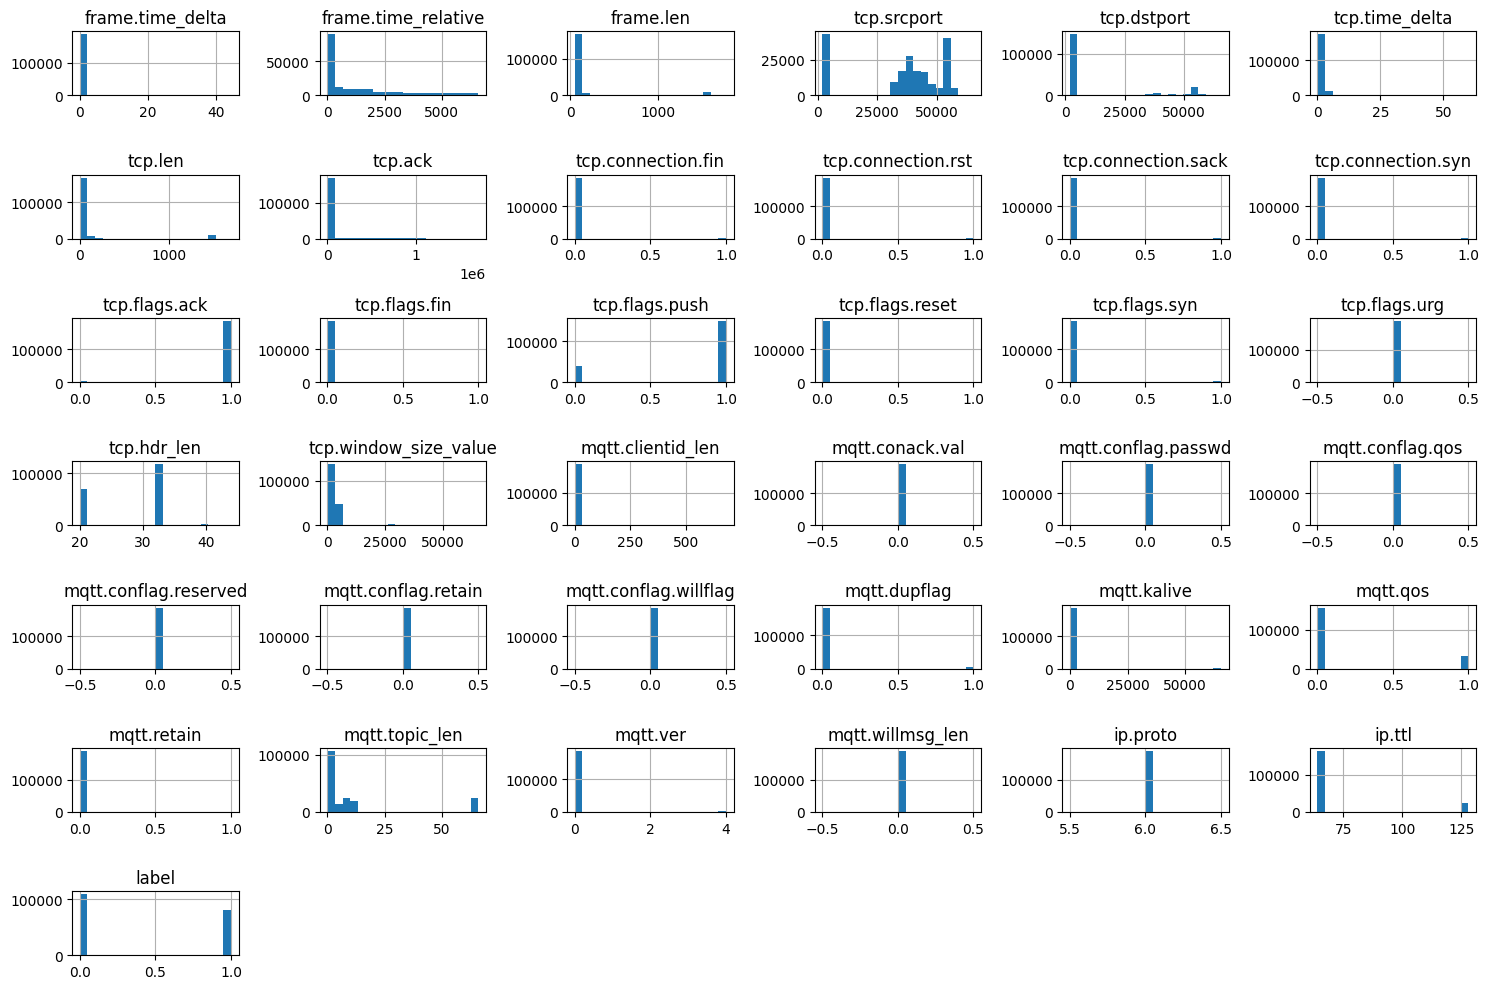

In [20]:
#!pip install matplotlib
import matplotlib.pyplot as plt

merged_df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()


In [22]:
object_columns = merged_df.select_dtypes(include=['object']).columns
print(f"Object columns: {list(object_columns)}")

Object columns: ['ip.src', 'ip.dst', 'tcp.flags', 'tcp.payload', 'tcp.pdu.size', 'tcp.checksum', 'mqtt.clientid', 'mqtt.conack.flags', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg', 'mqtt.msgtype', 'mqtt.topic', 'class']


In [23]:
for col in object_columns:
    print(f"Column '{col}':")
    print(merged_df[col].value_counts())
    print("\n")


Column 'ip.src':
ip.src
192.168.1.90    46210
192.168.1.91    24714
10.5.126.145    10596
10.5.126.147    10596
10.5.126.148    10518
10.5.126.146    10518
10.5.126.165     6858
10.5.126.167     6858
10.5.126.168     6782
10.5.126.166     6780
10.5.126.84      6084
10.16.120.44     5114
10.5.126.56      4544
10.16.120.72     4088
10.5.150.109     3222
10.5.150.157     1436
10.5.150.156     1436
10.5.150.152     1436
10.5.126.136     1356
10.5.126.132     1356
10.5.126.157     1356
10.5.126.152     1356
10.5.126.137     1356
10.5.126.156     1356
10.5.126.134      840
10.5.126.151      840
10.5.126.153      840
10.5.126.155      840
10.5.126.133      840
10.5.126.154      840
10.5.126.135      840
10.5.126.131      840
10.5.150.151      822
10.5.150.154      822
10.5.150.153      822
10.5.150.155      822
10.5.126.141      416
10.5.126.144      416
10.5.126.143      416
10.5.126.142      416
10.5.126.161      274
10.5.126.163      274
10.5.126.162      274
10.5.126.164      274
Name: co

In [24]:
merged_df['ip.src'] = merged_df['ip.src'].astype('category').cat.codes
merged_df['ip.dst'] = merged_df['ip.dst'].astype('category').cat.codes
merged_df['tcp.flags'] = merged_df['tcp.flags'].astype('category').cat.codes
merged_df.drop(columns=['tcp.payload'], inplace=True)
merged_df['mqtt.clientid'] = merged_df['mqtt.clientid'].astype('category').cat.codes
merged_df['mqtt.topic'] = merged_df['mqtt.topic'].astype('category').cat.codes
merged_df['mqtt.msgtype'] = merged_df['mqtt.msgtype'].astype('category').cat.codes
merged_df['mqtt.conflags'] = merged_df['mqtt.conflags'].astype('category').cat.codes
merged_df['class'] = merged_df['class'].astype('category').cat.codes


In [25]:
print(merged_df.dtypes)


frame.time_delta         float64
frame.time_relative      float64
frame.len                  int64
ip.src                      int8
ip.dst                      int8
tcp.srcport                int64
tcp.dstport                int64
tcp.flags                   int8
tcp.time_delta           float64
tcp.len                    int64
tcp.ack                    int64
tcp.connection.fin       float64
tcp.connection.rst       float64
tcp.connection.sack      float64
tcp.connection.syn       float64
tcp.flags.ack              int64
tcp.flags.fin              int64
tcp.flags.push             int64
tcp.flags.reset            int64
tcp.flags.syn              int64
tcp.flags.urg              int64
tcp.hdr_len                int64
tcp.pdu.size              object
tcp.window_size_value      int64
tcp.checksum              object
mqtt.clientid              int16
mqtt.clientid_len        float64
mqtt.conack.flags         object
mqtt.conack.val          float64
mqtt.conflag.passwd      float64
mqtt.confl

In [26]:
object_columns = merged_df.select_dtypes(include=['object']).columns
print(f"Colunas com tipo 'object': {list(object_columns)}")

Colunas com tipo 'object': ['tcp.pdu.size', 'tcp.checksum', 'mqtt.conack.flags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg']


In [27]:
# Conversão para numérico, com fallback para NaN
merged_df['tcp.pdu.size'] = pd.to_numeric(merged_df['tcp.pdu.size'], errors='coerce')
merged_df['mqtt.len'] = pd.to_numeric(merged_df['mqtt.len'], errors='coerce')

# Conversão para categorias (codificação como números inteiros)
merged_df['tcp.checksum'] = merged_df['tcp.checksum'].astype('category').cat.codes
merged_df['mqtt.msg'] = merged_df['mqtt.msg'].astype('category').cat.codes
merged_df['mqtt.conack.flags'] = merged_df['mqtt.conack.flags'].astype('category').cat.codes
merged_df['mqtt.hdrflags'] = merged_df['mqtt.hdrflags'].astype('category').cat.codes

In [28]:
merged_df.drop(columns=['tcp.checksum', 'mqtt.msg'], inplace=True)


In [29]:
print(merged_df.dtypes)


frame.time_delta         float64
frame.time_relative      float64
frame.len                  int64
ip.src                      int8
ip.dst                      int8
tcp.srcport                int64
tcp.dstport                int64
tcp.flags                   int8
tcp.time_delta           float64
tcp.len                    int64
tcp.ack                    int64
tcp.connection.fin       float64
tcp.connection.rst       float64
tcp.connection.sack      float64
tcp.connection.syn       float64
tcp.flags.ack              int64
tcp.flags.fin              int64
tcp.flags.push             int64
tcp.flags.reset            int64
tcp.flags.syn              int64
tcp.flags.urg              int64
tcp.hdr_len                int64
tcp.pdu.size             float64
tcp.window_size_value      int64
mqtt.clientid              int16
mqtt.clientid_len        float64
mqtt.conack.flags           int8
mqtt.conack.val          float64
mqtt.conflag.passwd      float64
mqtt.conflag.qos         float64
mqtt.confl

In [30]:
for col in merged_df.columns:
    unique_values = merged_df[col].nunique()
    print(f"Coluna '{col}': {unique_values} valores únicos")


Coluna 'frame.time_delta': 11904 valores únicos
Coluna 'frame.time_relative': 176587 valores únicos
Coluna 'frame.len': 633 valores únicos
Coluna 'ip.src': 44 valores únicos
Coluna 'ip.dst': 44 valores únicos
Coluna 'tcp.srcport': 2062 valores únicos
Coluna 'tcp.dstport': 2062 valores únicos
Coluna 'tcp.flags': 8 valores únicos
Coluna 'tcp.time_delta': 49228 valores únicos
Coluna 'tcp.len': 638 valores únicos
Coluna 'tcp.ack': 26555 valores únicos
Coluna 'tcp.connection.fin': 2 valores únicos
Coluna 'tcp.connection.rst': 2 valores únicos
Coluna 'tcp.connection.sack': 2 valores únicos
Coluna 'tcp.connection.syn': 2 valores únicos
Coluna 'tcp.flags.ack': 2 valores únicos
Coluna 'tcp.flags.fin': 2 valores únicos
Coluna 'tcp.flags.push': 2 valores únicos
Coluna 'tcp.flags.reset': 2 valores únicos
Coluna 'tcp.flags.syn': 2 valores únicos
Coluna 'tcp.flags.urg': 1 valores únicos
Coluna 'tcp.hdr_len': 4 valores únicos
Coluna 'tcp.pdu.size': 84 valores únicos
Coluna 'tcp.window_size_value': 57

In [32]:
correlations = merged_df.corr()['label'].sort_values(ascending=False)
print("Correlação com a variável 'label':\n", correlations)


Correlação com a variável 'label':
 label                    1.000000
ip.src                   0.557424
ip.ttl                   0.451898
mqtt.len                 0.397356
tcp.pdu.size             0.389725
mqtt.topic               0.385166
mqtt.topic_len           0.352042
tcp.dstport              0.346884
tcp.ack                  0.338438
ip.dst                   0.328031
tcp.len                  0.318514
mqtt.qos                 0.308138
frame.len                0.303503
tcp.window_size_value    0.301142
mqtt.dupflag             0.205104
tcp.flags.syn            0.168705
tcp.connection.syn       0.118671
tcp.connection.sack      0.118671
tcp.flags.fin            0.109362
tcp.connection.fin       0.109362
tcp.flags.reset          0.108759
tcp.connection.rst       0.108759
mqtt.ver                 0.106796
mqtt.kalive              0.085703
mqtt.clientid            0.074876
mqtt.retain              0.029364
mqtt.clientid_len        0.027462
tcp.srcport              0.015110
frame.time_d

In [33]:
low_corr_cols = correlations[abs(correlations) < 0.1].index
print(f"Colunas com baixa correlação:\n {list(low_corr_cols)}")
merged_df.drop(columns=low_corr_cols, inplace=True)


Colunas com baixa correlação:
 ['mqtt.kalive', 'mqtt.clientid', 'mqtt.retain', 'mqtt.clientid_len', 'tcp.srcport']


In [34]:
nan_corr_cols = correlations[correlations.isna()].index
print(f"Colunas com NaN na correlação:\n {list(nan_corr_cols)}")
merged_df.drop(columns=nan_corr_cols, inplace=True)


Colunas com NaN na correlação:
 ['tcp.flags.urg', 'mqtt.conack.val', 'mqtt.conflag.passwd', 'mqtt.conflag.qos', 'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.willflag', 'mqtt.willmsg_len', 'ip.proto']


In [43]:
print("Dimensão do DataFrame após limpeza:", merged_df.shape)
print("Tipos de dados após limpeza:\n", merged_df.dtypes)


Dimensão do DataFrame após limpeza: (188694, 35)
Tipos de dados após limpeza:
 frame.time_delta         float64
frame.time_relative      float64
frame.len                  int64
ip.src                      int8
ip.dst                      int8
tcp.dstport                int64
tcp.flags                   int8
tcp.time_delta           float64
tcp.len                    int64
tcp.ack                    int64
tcp.connection.fin       float64
tcp.connection.rst       float64
tcp.connection.sack      float64
tcp.connection.syn       float64
tcp.flags.ack              int64
tcp.flags.fin              int64
tcp.flags.push             int64
tcp.flags.reset            int64
tcp.flags.syn              int64
tcp.hdr_len                int64
tcp.pdu.size             float64
tcp.window_size_value      int64
mqtt.conack.flags           int8
mqtt.conflags               int8
mqtt.dupflag             float64
mqtt.hdrflags               int8
mqtt.len                 float64
mqtt.msgtype                in

In [36]:
remaining_objects = merged_df.select_dtypes(include=['object']).columns
print(f"Colunas restantes do tipo 'object': {list(remaining_objects)}")


Colunas restantes do tipo 'object': []


In [45]:
print("Valores ausentes restantes por coluna:\n", merged_df.isnull().sum())


Valores ausentes restantes por coluna:
 frame.time_delta         0
frame.time_relative      0
frame.len                0
ip.src                   0
ip.dst                   0
tcp.dstport              0
tcp.flags                0
tcp.time_delta           0
tcp.len                  0
tcp.ack                  0
tcp.connection.fin       0
tcp.connection.rst       0
tcp.connection.sack      0
tcp.connection.syn       0
tcp.flags.ack            0
tcp.flags.fin            0
tcp.flags.push           0
tcp.flags.reset          0
tcp.flags.syn            0
tcp.hdr_len              0
tcp.pdu.size             0
tcp.window_size_value    0
mqtt.conack.flags        0
mqtt.conflags            0
mqtt.dupflag             0
mqtt.hdrflags            0
mqtt.len                 0
mqtt.msgtype             0
mqtt.qos                 0
mqtt.topic               0
mqtt.topic_len           0
mqtt.ver                 0
ip.ttl                   0
class                    0
label                    0
dtype: int64


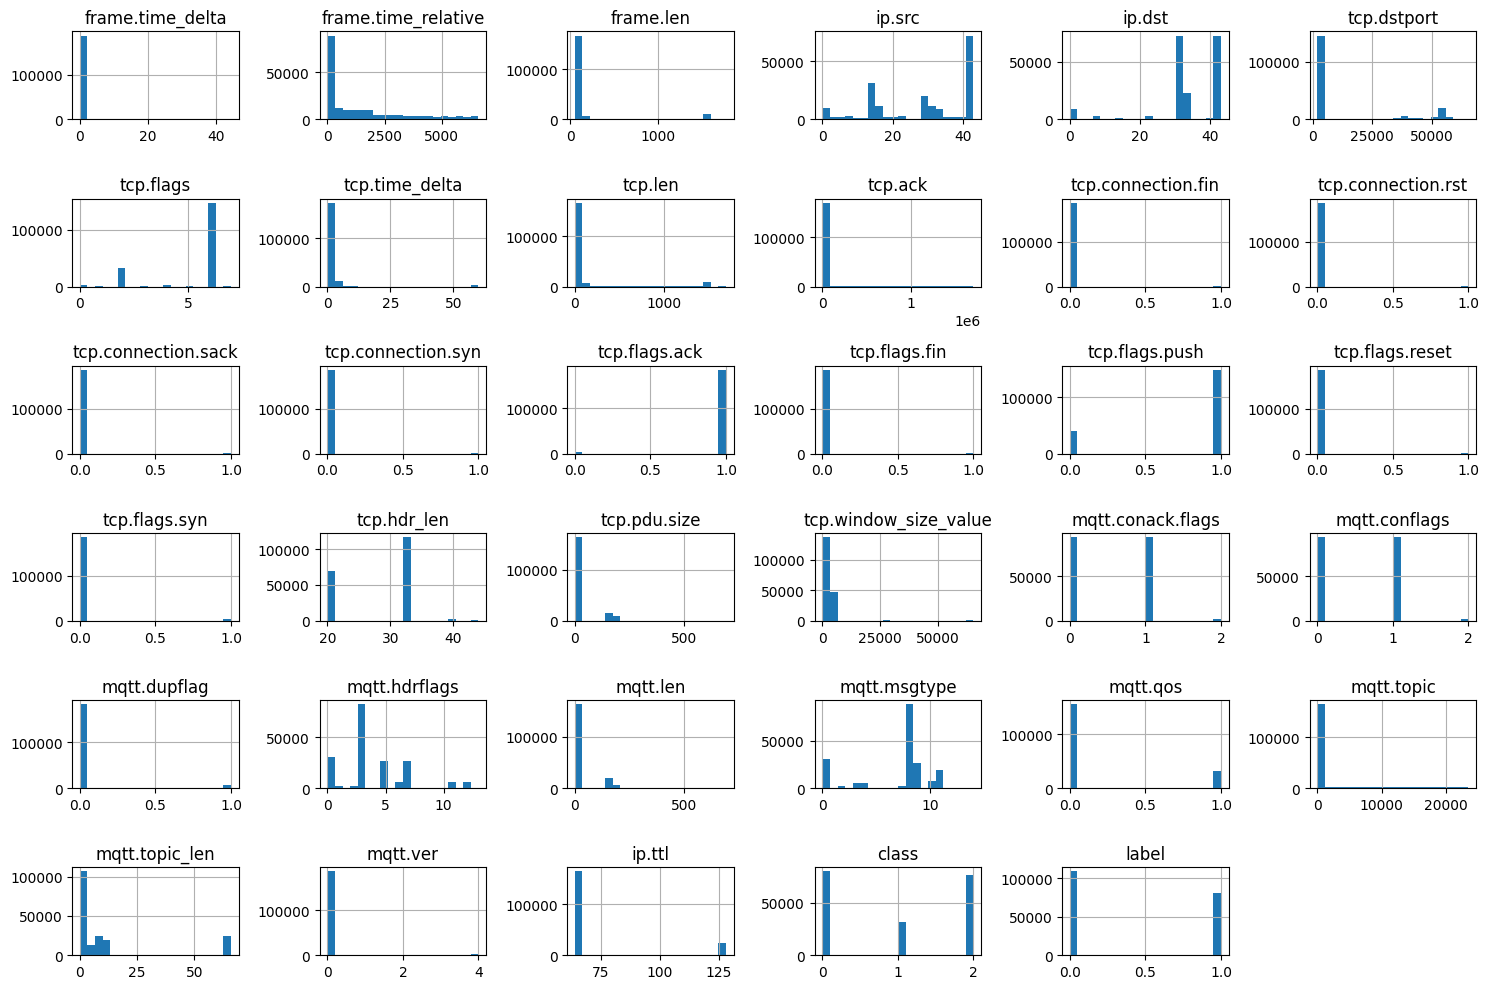

In [38]:
import matplotlib.pyplot as plt

merged_df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

In [39]:

# Definir features como todas as colunas, exceto a variável-alvo 'label'
features = merged_df.drop(columns=['label'], axis=1)

# Verificar as dimensões
print("Dimensão de features:", features.shape)
print("Dimensão de merged_df:", merged_df.shape)


Dimensão de features: (188694, 34)
Dimensão de merged_df: (188694, 35)


In [40]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Instancia o scaler
scaler = MinMaxScaler()

# Aplica a normalização em todas as colunas numéricas (exceto a coluna 'label')
features = merged_df.drop(columns=['label'])  # Remove a coluna alvo
normalized_features = scaler.fit_transform(features)  # Normaliza os dados

# Reconstrói o DataFrame normalizado
df1_normalized = pd.DataFrame(normalized_features, columns=features.columns, index=merged_df.index)

# Adiciona a coluna 'label' ao DataFrame normalizado
df1_normalized['label'] = merged_df['label'].values

# Verifica as primeiras linhas
print(df1_normalized.head())


   frame.time_delta  frame.time_relative  frame.len    ip.src    ip.dst  \
0      0.000000e+00         0.000000e+00   0.011682  0.000000  0.023256   
1      1.170214e-06         7.865633e-09   0.011682  0.023256  0.000000   
2      1.800329e-07         9.075730e-09   0.011682  0.000000  0.023256   
3      2.700494e-07         1.089088e-08   0.011682  0.023256  0.000000   
4      6.751235e-08         1.134466e-08   0.011682  0.000000  0.023256   

   tcp.dstport  tcp.flags  tcp.time_delta  tcp.len       tcp.ack  ...  \
0     0.000000   0.000000    0.000000e+00      0.0  0.000000e+00  ...   
1     0.863764   0.571429    8.661278e-07      0.0  5.838032e-07  ...   
2     0.000000   0.000000    0.000000e+00      0.0  0.000000e+00  ...   
3     0.863795   0.571429    1.998757e-07      0.0  5.838032e-07  ...   
4     0.000000   0.000000    0.000000e+00      0.0  0.000000e+00  ...   

   mqtt.hdrflags  mqtt.len  mqtt.msgtype  mqtt.qos  mqtt.topic  \
0            0.0       0.0           0.0    

In [41]:
print("Dimensão do DataFrame normalizado:", df1_normalized.shape)
print("Dimensão do DataFrame original:", merged_df.shape)


Dimensão do DataFrame normalizado: (188694, 35)
Dimensão do DataFrame original: (188694, 35)


In [43]:
from sklearn.model_selection import train_test_split

# Verifica a consistência dos tamanhos
print(f"Dimensão de df1_normalized: {df1_normalized.shape}")
print(f"Dimensão de df1_normalized['label']: {df1_normalized['label'].shape}")

# Divide os dados para treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    df1_normalized.drop(labels=['label'], axis=1),  # Todas as colunas exceto 'label'
    df1_normalized['label'],                       # A variável-alvo
    test_size=0.3,
    random_state=100
)

# Verifica as dimensões após a divisão
print(f"Dimensão de X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Dimensão de X_test: {X_test.shape}, y_test: {y_test.shape}")


Dimensão de df1_normalized: (188694, 35)
Dimensão de df1_normalized['label']: (188694,)
Dimensão de X_train: (132085, 34), y_train: (132085,)
Dimensão de X_test: (56609, 34), y_test: (56609,)


In [52]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

print('---------- SelectFromModel LogisticRegression -----------')
embeded_LR_selector = SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear'), threshold='0.9*median',
                                      max_features = 10)
embeded_LR_selector.fit(X_train, y_train)
embeded_LR_support = embeded_LR_selector.get_support()
print('embeded_LR_support',embeded_LR_support)
#embeded_lr_selector = embeded_lr_selector.scores_
#embeded_lr_support = embeded_lr_selector.get_support()
#embeded_LR_feature = df.loc[:,embeded_LR_support].columns.tolist()

embeded_LR_feature = X_train.loc[:,embeded_LR_support].columns.tolist()

print(len(embeded_LR_feature), 'selected features')
print('embeded_LR_features: ', embeded_LR_feature)

---------- SelectFromModel LogisticRegression -----------
embeded_LR_support [False False False  True  True False False False False False False False
 False  True  True False  True False False False False False  True False
 False False False  True False False  True False  True  True]
10 selected features
embeded_LR_features:  ['ip.src', 'ip.dst', 'tcp.connection.syn', 'tcp.flags.ack', 'tcp.flags.push', 'mqtt.conack.flags', 'mqtt.msgtype', 'mqtt.topic_len', 'ip.ttl', 'class']


In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import linear_model #Linear Regression
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC   #SVM

from sklearn.metrics import confusion_matrix  
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

In [54]:

print('--------Applying GaussianNB Classifier ----------')
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)  
gnb_prediction = gnb.predict(X_test) 

print('--------Applying KNeighborsClassifier Classifier ----------')
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

print('--------Applying RandomForestClassifier Classifier ----------')
RF = RandomForestClassifier(max_depth=10, random_state=100)  
RF.fit(X_train, y_train)
RF_prediction = RF.predict(X_test)

print('--------Applying AdaBoostClassifier Classifier ----------')
AB = AdaBoostClassifier()
AB.fit(X_train, y_train)
AB_prediction = AB.predict(X_test)

print('--------Applying LogisticRegression Classifier ----------')
#LogR = LogisticRegression()
LogR = linear_model.LogisticRegression()
LogR.fit(X_train, y_train)
LogR_prediction = LogR.predict(X_test)

print('--------Applying DecisionTree Classifier ----------')
DT = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5)
DT.fit(X_train, y_train)
DT_prediction = DT.predict(X_test)


--------Applying GaussianNB Classifier ----------
--------Applying KNeighborsClassifier Classifier ----------
--------Applying RandomForestClassifier Classifier ----------
--------Applying AdaBoostClassifier Classifier ----------


/opt/conda/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


--------Applying LogisticRegression Classifier ----------
--------Applying DecisionTree Classifier ----------


In [55]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Criar o ensemble com votação majoritária (hard voting)
ensemble_model = VotingClassifier(
    estimators=[
        ('gnb', gnb),  # Gaussian Naive Bayes
        ('knn', KNN_model),  # K-Nearest Neighbors
        ('rf', RF),  # Random Forest
        ('ab', AB),  # AdaBoost
        ('logr', LogR),  # Logistic Regression
        ('dt', DT)  # Decision Tree
    ],
    voting='hard'  # 'hard' para votação majoritária; 'soft' se os modelos suportarem probabilidades
)

# Treinar o ensemble com os mesmos dados de treinamento
ensemble_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
ensemble_predictions = ensemble_model.predict(X_test)

# Avaliar o desempenho do ensemble
print("Desempenho do Ensemble:")
print(f"Acurácia: {accuracy_score(y_test, ensemble_predictions)}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, ensemble_predictions))
print("\nRelatório de Classificação:")
print(classification_report(y_test, ensemble_predictions))


/opt/conda/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Desempenho do Ensemble:
Acurácia: 1.0

Matriz de Confusão:
[[32620     0]
 [    0 23989]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32620
           1       1.00      1.00      1.00     23989

    accuracy                           1.00     56609
   macro avg       1.00      1.00      1.00     56609
weighted avg       1.00      1.00      1.00     56609



In [44]:
X_test.head()

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,tcp.ack,...,mqtt.dupflag,mqtt.hdrflags,mqtt.len,mqtt.msgtype,mqtt.qos,mqtt.topic,mqtt.topic_len,mqtt.ver,ip.ttl,class
109898,1.350247e-07,0.253401,0.016939,0.860465,0.790698,0.0,0.857143,8.324141e-02,0.008834,0.000034,...,0.0,0.230769,0.018786,0.571429,0.0,0.002517,0.121212,0.0,0.0,0.5
135455,2.813015e-06,0.112392,0.014019,0.651163,0.744186,0.0,0.857143,3.331109e-02,0.005889,0.000017,...,0.0,0.230769,0.011561,0.571429,0.0,0.002347,0.045455,0.0,0.0,1.0
146863,6.593706e-06,0.301470,0.014019,0.651163,0.744186,0.0,0.857143,3.332720e-02,0.005889,0.000041,...,0.0,0.230769,0.011561,0.571429,0.0,0.002347,0.045455,0.0,0.0,1.0
12834,2.250412e-08,0.000737,0.067757,0.976744,1.000000,0.0,0.857143,1.665630e-08,0.068316,0.001093,...,0.0,0.384615,0.252890,0.642857,1.0,0.279150,0.984848,0.0,0.0,0.0
98063,3.825700e-07,0.250614,0.015187,0.418605,0.767442,0.0,0.857143,4.991386e-02,0.007067,0.000034,...,0.0,0.230769,0.014451,0.571429,0.0,0.002304,0.075758,0.0,0.0,0.5


In [45]:
X_test.shape

(56609, 34)

In [46]:
X_test.head()

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,tcp.ack,...,mqtt.dupflag,mqtt.hdrflags,mqtt.len,mqtt.msgtype,mqtt.qos,mqtt.topic,mqtt.topic_len,mqtt.ver,ip.ttl,class
109898,1.350247e-07,0.253401,0.016939,0.860465,0.790698,0.0,0.857143,8.324141e-02,0.008834,0.000034,...,0.0,0.230769,0.018786,0.571429,0.0,0.002517,0.121212,0.0,0.0,0.5
135455,2.813015e-06,0.112392,0.014019,0.651163,0.744186,0.0,0.857143,3.331109e-02,0.005889,0.000017,...,0.0,0.230769,0.011561,0.571429,0.0,0.002347,0.045455,0.0,0.0,1.0
146863,6.593706e-06,0.301470,0.014019,0.651163,0.744186,0.0,0.857143,3.332720e-02,0.005889,0.000041,...,0.0,0.230769,0.011561,0.571429,0.0,0.002347,0.045455,0.0,0.0,1.0
12834,2.250412e-08,0.000737,0.067757,0.976744,1.000000,0.0,0.857143,1.665630e-08,0.068316,0.001093,...,0.0,0.384615,0.252890,0.642857,1.0,0.279150,0.984848,0.0,0.0,0.0
98063,3.825700e-07,0.250614,0.015187,0.418605,0.767442,0.0,0.857143,4.991386e-02,0.007067,0.000034,...,0.0,0.230769,0.014451,0.571429,0.0,0.002304,0.075758,0.0,0.0,0.5


In [47]:
# Supondo que X_test já está definido
print(X_test.columns.tolist())


['frame.time_delta', 'frame.time_relative', 'frame.len', 'ip.src', 'ip.dst', 'tcp.dstport', 'tcp.flags', 'tcp.time_delta', 'tcp.len', 'tcp.ack', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.sack', 'tcp.connection.syn', 'tcp.flags.ack', 'tcp.flags.fin', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.flags.syn', 'tcp.hdr_len', 'tcp.pdu.size', 'tcp.window_size_value', 'mqtt.conack.flags', 'mqtt.conflags', 'mqtt.dupflag', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.topic', 'mqtt.topic_len', 'mqtt.ver', 'ip.ttl', 'class']


In [74]:
#!pip install confluent-kafka

In [ ]:
#!pip install confluent-kafka
# Instalar dependência do Kafka (se necessário)
# !pip install confluent-kafka

from confluent_kafka import Producer
import pandas as pd
import joblib
import time
import json

# Configuração do Kafka Producer
producer_conf = {
    'bootstrap.servers': 'kafka:9092'
}
producer = Producer(producer_conf)

# Callback para reportar o estado do envio
def delivery_report(err, msg):
    if err is not None:
        print(f"Erro ao enviar mensagem: {err}")
    else:
        print(f"Mensagem enviada com sucesso para {msg.topic()} [{msg.partition()}]")

# Carregar o modelo ensemble salvo
ensemble_model = joblib.load('ensemble_model.pkl')
print("Modelo ensemble carregado com sucesso.")

# Certifique-se de que X_data contém as mesmas features usadas no treinamento
X_data = X_test.copy()  # Substitua por seu DataFrame real, se necessário

# Publicar os dados no tópico Kafka

for index, row in X_data.iterrows():
    X_row = pd.DataFrame([row], columns=X_data.columns)

    # Garantir que X_row contenha somente as colunas esperadas
    expected_features = ensemble_model.feature_names_in_

    # Adicionar colunas ausentes
    for col in expected_features:
        if col not in X_row.columns:
            X_row[col] = 0  # Ou outro valor padrão adequado

    # Remover colunas não esperadas
    X_row = X_row[expected_features]

    # Realizar a previsão
    prediction = ensemble_model.predict(X_row)[0]
    label_type = 0 if prediction == 0 else 1

    # Criar o payload
    payload = {
        "frame.time_delta": row.get("frame.time_delta", None),
        "frame.time_relative": row.get("frame.time_relative", None),
        "frame.len": row.get("frame.len", None),
        "ip.src": row.get("ip.src", None),
        "ip.dst": row.get("ip.dst", None),
        "tcp.dstport": row.get("tcp.dstport", None),
        "tcp.flags": row.get("tcp.flags", None),
        "tcp.time_delta": row.get("tcp.time_delta", None),
        "tcp.len": row.get("tcp.len", None),
        "tcp.ack": row.get("tcp.ack", None),
        "tcp.connection.fin": row.get("tcp.connection.fin", None),
        "tcp.connection.rst": row.get("tcp.connection.rst", None),
        "tcp.connection.sack": row.get("tcp.connection.sack", None),
        "tcp.connection.syn": row.get("tcp.connection.syn", None),
        "tcp.flags.ack": row.get("tcp.flags.ack", None),
        "tcp.flags.fin": row.get("tcp.flags.fin", None),
        "tcp.flags.push": row.get("tcp.flags.push", None),
        "tcp.flags.reset": row.get("tcp.flags.reset", None),
        "tcp.flags.syn": row.get("tcp.flags.syn", None),
        "tcp.hdr_len": row.get("tcp.hdr_len", None),
        "tcp.pdu.size": row.get("tcp.pdu.size", None),
        "tcp.window_size_value": row.get("tcp.window_size_value", None),
        "mqtt.conack.flags": row.get("mqtt.conack.flags", None),
        "mqtt.conflags": row.get("mqtt.conflags", None),
        "mqtt.dupflag": row.get("mqtt.dupflag", None),
        "mqtt.hdrflags": row.get("mqtt.hdrflags", None),
        "mqtt.len": row.get("mqtt.len", None),
        "mqtt.msgtype": row.get("mqtt.msgtype", None),
        "mqtt.qos": row.get("mqtt.qos", None),
        "mqtt.topic": row.get("mqtt.topic", None),
        "mqtt.topic_len": row.get("mqtt.topic_len", None),
        "mqtt.ver": row.get("mqtt.ver", None),
        "ip.ttl": row.get("ip.ttl", None),
        "class": row.get("class", None),
        "label": label_type
    }

    # Enviar para o Kafka
    producer.produce(
        topic='kf-topic',
        value=json.dumps(payload),
        callback=delivery_report
    )

    producer.flush()
    print(f"Publicado no Kafka: {payload}")

    time.sleep(10)


Modelo ensemble carregado com sucesso.
Mensagem enviada com sucesso para kf-topic [0]
Publicado no Kafka: {'frame.time_delta': np.float64(1.3502470378224225e-07), 'frame.time_relative': np.float64(0.2534013693884243), 'frame.len': np.float64(0.0169392523364486), 'ip.src': np.float64(0.8604651162790697), 'ip.dst': np.float64(0.7906976744186046), 'tcp.dstport': np.float64(0.0), 'tcp.flags': np.float64(0.8571428571428571), 'tcp.time_delta': np.float64(0.08324141274241918), 'tcp.len': np.float64(0.008833922261484098), 'tcp.ack': np.float64(3.444438865880556e-05), 'tcp.connection.fin': np.float64(0.0), 'tcp.connection.rst': np.float64(0.0), 'tcp.connection.sack': np.float64(0.0), 'tcp.connection.syn': np.float64(0.0), 'tcp.flags.ack': np.float64(1.0), 'tcp.flags.fin': np.float64(0.0), 'tcp.flags.push': np.float64(1.0), 'tcp.flags.reset': np.float64(0.0), 'tcp.flags.syn': np.float64(0.0), 'tcp.hdr_len': np.float64(0.5), 'tcp.pdu.size': np.float64(0.02158273381294964), 'tcp.window_size_value'

In [66]:
# Instalar a biblioteca correta
 
#!pip install confluent-kafka

import pandas as pd
import joblib
import time
from confluent_kafka import Producer
import json

# Configuração do Kafka Producer
producer_config = {
    'bootstrap.servers': 'kafka:9092'  # Endereço do broker Kafka
}
producer = Producer(producer_config)

# Carregar o modelo ensemble salvo
ensemble_model = joblib.load('ensemble_model.pkl')
print("Modelo ensemble carregado com sucesso.")

# Certifique-se de que X_data contém as mesmas features usadas no treinamento
X_data = X_test.copy()  # Substitua por seu dataframe real, se necessário

# Função para callback ao enviar mensagens
def delivery_report(err, msg):
    if err is not None:
        print(f"Erro ao enviar mensagem: {err}")
    else:
        print(f"Mensagem enviada para {msg.topic()} [{msg.partition()}]")

# Publicar os dados no tópico Kafka
for index, row in X_data.iterrows():
    X_row = pd.DataFrame([row], columns=X_data.columns)
    prediction = ensemble_model.predict(X_row)[0]
    label_type = 0 if prediction == 0 else 1  # Corrigido para refletir tipos de rótulos adequados

 
    
    # Criar o payload
    # Criar o payload com os dados organizados
payload = {
    "frame.time_delta": row.get("frame.time_delta", None),
    "frame.time_relative": row.get("frame.time_relative", None),
    "frame.len": row.get("frame.len", None),
    "ip.src": row.get("ip.src", None),
    "ip.dst": row.get("ip.dst", None),
    "tcp.dstport": row.get("tcp.dstport", None),
    "tcp.flags": row.get("tcp.flags", None),
    "tcp.time_delta": row.get("tcp.time_delta", None),
    "tcp.len": row.get("tcp.len", None),
    "tcp.ack": row.get("tcp.ack", None),
    "tcp.connection.fin": row.get("tcp.connection.fin", None),
    "tcp.connection.rst": row.get("tcp.connection.rst", None),
    "tcp.connection.sack": row.get("tcp.connection.sack", None),
    "tcp.connection.syn": row.get("tcp.connection.syn", None),
    "tcp.flags.ack": row.get("tcp.flags.ack", None),
    "tcp.flags.fin": row.get("tcp.flags.fin", None),
    "tcp.flags.push": row.get("tcp.flags.push", None),
    "tcp.flags.reset": row.get("tcp.flags.reset", None),
    "tcp.flags.syn": row.get("tcp.flags.syn", None),
    "tcp.hdr_len": row.get("tcp.hdr_len", None),
    "tcp.pdu.size": row.get("tcp.pdu.size", None),
    "tcp.window_size_value": row.get("tcp.window_size_value", None),
    "mqtt.conack.flags": row.get("mqtt.conack.flags", None),
    "mqtt.conflags": row.get("mqtt.conflags", None),
    "mqtt.dupflag": row.get("mqtt.dupflag", None),
    "mqtt.hdrflags": row.get("mqtt.hdrflags", None),
    "mqtt.len": row.get("mqtt.len", None),
    "mqtt.msgtype": row.get("mqtt.msgtype", None),
    "mqtt.qos": row.get("mqtt.qos", None),
    "mqtt.topic": row.get("mqtt.topic", None),
    "mqtt.topic_len": row.get("mqtt.topic_len", None),
    "mqtt.ver": row.get("mqtt.ver", None),
    "ip.ttl": row.get("ip.ttl", None),
    "class": row.get("class", None),
    "label": label_type  # Adicionado ao final como no exemplo fornecido
}


    # Enviar para o Kafka
    producer.produce(
        topic='kf-topic',
        key=str(index),  # Chave opcional
        value=json.dumps(payload),
        callback=delivery_report  # Callback para confirmação
    )

    producer.flush()  # Envia todas as mensagens acumuladas no buffer
    print(f"Publicado no Kafka: {payload}")
    time.sleep(10)  # Aguarda 10 segundos entre cada mensagem

# Fechar o produtor Kafka
producer.flush()  # Garante que todas as mensagens foram enviadas


IndentationError: unexpected indent (1239430464.py, line 81)

In [23]:
!pip uninstall kafka kafka-python -y
!pip install kafka-python
!pip install confluent-kafka
!pip uninstall kafka kafka-python -y


Found existing installation: kafka 1.3.5
Uninstalling kafka-1.3.5:
  Successfully uninstalled kafka-1.3.5
  Using cached kafka_python-2.0.2-py2.py3-none-any.whl.metadata (7.8 kB)
Using cached kafka_python-2.0.2-py2.py3-none-any.whl (246 kB)
Found existing installation: kafka-python 2.0.2
Uninstalling kafka-python-2.0.2:
  Successfully uninstalled kafka-python-2.0.2


In [70]:
#!pip install kafka
#!pip uninstall kafka
#!pip install kafka-python

# Certifique-se de que o confluent-kafka está instalado
# !pip install confluent-kafka

import pandas as pd
import joblib
import time
from confluent_kafka import Producer
import json

# Configuração do Kafka Producer
producer_config = {
    'bootstrap.servers': 'kafka:9092'  # Endereço do broker Kafka
}
producer = Producer(producer_config)

# Carregar o modelo ensemble salvo
ensemble_model = joblib.load('ensemble_model.pkl')
print("Modelo ensemble carregado com sucesso.")

# Certifique-se de que X_data contém as mesmas features usadas no treinamento
X_data = X_test.copy()  # Substitua por seu dataframe real, se necessário

# Configuração do batch
batch_size = 2  # Número de mensagens por lote
batch = []  # Lista temporária para armazenar o lote de mensagens

# Função de callback para verificar status da entrega
def delivery_report(err, msg):
    if err is not None:
        print(f"Erro ao enviar mensagem: {err}")
    else:
        print(f"Mensagem enviada com sucesso para {msg.topic()} [partição: {msg.partition()}]")

# Publicar os dados no tópico Kafka
for index, row in X_data.iterrows():
    X_row = pd.DataFrame([row], columns=X_data.columns)
    prediction = ensemble_model.predict(X_row)[0]
    label_type = 0 if prediction == 0 else 1  # Corrigido para refletir tipos de rótulos adequados

    # Criar o payload
    payload = {
        "frame.time_delta": row.get("frame.time_delta", None),
        "tcp.time_delta": row.get("tcp.time_delta", None),
        "tcp.flags.ack": row.get("tcp.flags.ack", None),
        "tcp.flags.push": row.get("tcp.flags.push", None),
        "mqtt.hdrflags": row.get("mqtt.hdrflags", None),
        "mqtt.msgtype": row.get("mqtt.msgtype", None),
        "mqtt.qos": row.get("mqtt.qos", None),
        "mqtt.ver": row.get("mqtt.ver", None),
        "label": label_type
    }

    batch.append(payload)  # Adiciona o payload ao lote

    # Verifica se o tamanho do lote atingiu o limite
    if len(batch) >= batch_size:
        for message in batch:
            producer.produce(
                topic='kf-topic',
                key=str(index),
                value=json.dumps(message),
                callback=delivery_report
            )
        producer.flush()  # Garante que todas as mensagens foram enviadas
        print(f"Lote enviado para o Kafka: {batch}")
        batch = []  # Limpa o lote após o envio
        time.sleep(5)  # Aguarda 5 segundos antes de processar o próximo lote

# Enviar o lote final, se houver mensagens restantes
if batch:
    for message in batch:
        producer.produce(
            topic='kf-topic',
            key=str(index),
            value=json.dumps(message),
            callback=delivery_report
        )
    producer.flush()
    print(f"Último lote enviado para o Kafka: {batch}")

# Fechar o produtor Kafka
producer.flush()
print("Produtor Kafka finalizado.")


Modelo ensemble carregado com sucesso.


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- class
- frame.len
- frame.time_relative
- ip.dst
- ip.src
- ...
Feature names seen at fit time, yet now missing:
- mqtt.retain
